In [3]:
import pandas as pd
import numpy as np
import riskfolio as rp
import yfinance as yf
import matplotlib.pyplot as plt#Read in data and set index as the date
df = pd.read_csv('yf_df.csv')
df.set_index('Date', inplace = True)
df.index = pd.to_datetime(df.index)

In [5]:
yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

assets = ['BTC-USD','ETH-USD','XRP-USD','DOGE-USD','LINK-USD']

# Define the start date
start_date = '2020-05-11'
end_date = '2024-05-21'

# Downloading data
data = yf.download(assets, start = start_date, end = end_date)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

[*********************100%%**********************]  5 of 5 completed


/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in

,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,LINK-USD
Date,,,,,
2020-05-12,2.3563%,2.0721%,1.8286%,2.9932%,1.8411%
2020-05-13,5.2872%,2.3549%,5.2193%,1.8430%,1.9445%
2020-05-14,5.0025%,2.1023%,1.8855%,1.0361%,0.8184%
2020-05-15,-4.1662%,-2.6418%,-3.6100%,-3.2830%,-2.0765%
2020-05-16,0.5233%,0.2793%,2.5838%,2.3252%,0.5636%


In [6]:
# Building the portfolio object
port = rp.Portfolio(returns=Y, nea = 4)
# Select method and estimate input parameters:
# Method to estimate expected returns based on historical data
method_mu='hist'
# Method to estimate covariance matrix based on historical data
method_cov='hist' 
# Estimate mean and covariance based on historical data
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic(historical), BL(Black Litterman), FM(Factor Model) or BL_FM(Black litterman with factors)
rm = 'CVaR' # Risk measure used, there are 13 available risk measures
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,BTC-USD,ETH-USD,XRP-USD,DOGE-USD,LINK-USD
weights,18.2915%,38.6362%,19.7019%,9.2963%,14.0741%


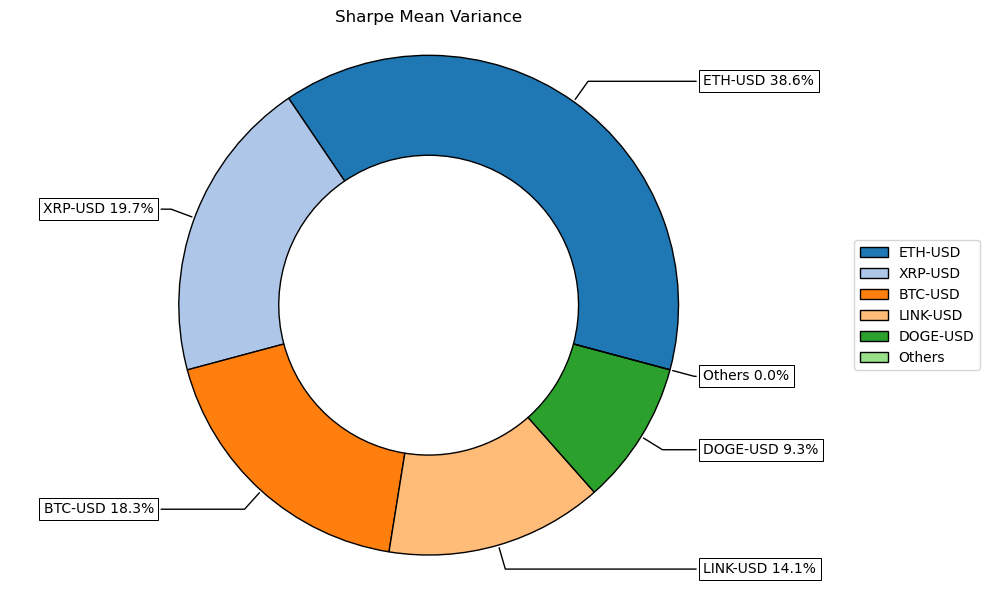

In [9]:
# Plotting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20", height=6, width=10, ax=None)